In [1]:
print("Hello world.")

Hello world.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from keras.datasets import mnist
from PIL import Image
# for creating a one hot vector for labels
from keras.utils import np_utils
from IPython.display import display, Image
#import the models
from keras import Model
#add layers
from keras import layers
#add optimizer
from keras import optimizers
#add loss function 
from keras import losses

import keras
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
 

In [4]:
inputs = keras.Input(shape=(256, 256, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 254, 254, 32) 896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 252, 252, 64) 18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 84, 84, 64)   0           conv2d_1[0][0]                   
_________________________________________________________________________________________

In [5]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

108
0
100
108   108
skip


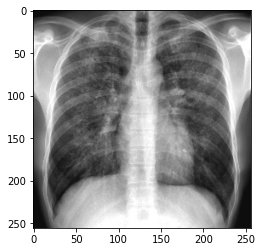

In [6]:
x = []
label = []
valid_covid = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/COVID19"
valid_covid_list = os.listdir(valid_covid)

print(len(valid_covid_list))
for i in range( 0, len(valid_covid_list)):
    if i % 100 == 0:
       print(i)
    link = valid_covid+'/'+ valid_covid_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, ( 256 , 256 ))
    x.append(image)
    #print(gray_image)
    label.append([0])

plt.imshow(image)
print(len(x)," ", len(label))
print("skip")

110
0
100
218   218
skip


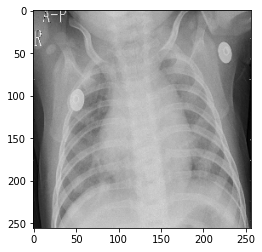

In [7]:

valid_pneumonia = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/PNEUMONIA"
valid_pneumonia_list = os.listdir(valid_pneumonia)

print(len(valid_pneumonia_list))
for i in range( 0, len(valid_pneumonia_list)):
    if i % 100 == 0:
       print(i)
    link = valid_pneumonia+'/'+ valid_pneumonia_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256 , 256 ))
    x.append(image)
    #print(gray_image)
    label.append([1])

plt.imshow(image)
print(len(x)," ", len(label))
print("skip")

110
0
100
328   328
skip


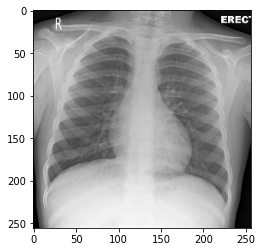

In [8]:

valid_normal = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/NORMAL"
valid_normal_list = os.listdir(valid_normal)

print(len(valid_normal_list))
for i in range( 0, len(valid_normal_list)):
    if i % 100 == 0:
       print(i)
    link = valid_normal+'/'+ valid_normal_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, ( 256 , 256 ))
    x.append(image)
    #print(gray_image)
    label.append([2])

plt.imshow(image)
print(len(x)," ", len(label))
print("skip")

In [9]:
x = np.asarray(x)
print(x.shape)
label = keras.utils.to_categorical(label, 10 )
print(label.shape)
print(label)

(328, 256, 256, 3)
(328, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [10]:
model.fit(x, label ,  epochs=100, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 85s 9s/step - loss: 16.0428 - acc: 0.2915 - val_loss: 1.7022 - val_acc: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 82s 9s/step - loss: 1.5412 - acc: 0.3514 - val_loss: 2.0580 - val_acc: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 82s 9s/step - loss: 1.4262 - acc: 0.3405 - val_loss: 2.7558 - val_acc: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 82s 9s/step - loss: 1.2219 - acc: 0.4058 - val_loss: 2.6482 - val_acc: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 82s 9s/step - loss: 1.5955 - acc: 0.3401 - val_loss: 4.9709 - val_acc: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 82s 9s/step - loss: 1.3387 - acc: 0.4481 - val_loss: 2.4708 - val_acc: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 82s 9s/step - loss: 1.1353 - acc: 0.4169 - val_loss: 1.6620 - val_acc: 0.0000e+00
Epoch 8/100
9/9 [==============================] - 82s 9s/step - los

In [11]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/COVID19"

test_data = []
p_covid = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_covid)):
   link = p+'/'+p_covid[i]
   img = cv2.imread(link)
   img = cv2.resize(img, ( 256 ,  256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_covid = np.array(test_data)
#test = test / 255.0
prediction_covid =  model.predict(test_data_covid)

array = []
print(len(prediction_covid))
for i in range(0, len(prediction_covid)):
   #print(len(prediction_covid[i]))
   array.append(prediction_covid[i][0])
   array.append(prediction_covid[i][1])
   array.append(prediction_covid[i][2])
   maximum = max(array)
   #print("length of array ", len(array))
   id = array.index(maximum)
   if id != 0:
      print("error in index ",id)
   array.clear()
   #print("length of array ",len(array))

108
error in index  1
error in index  1


In [12]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/PNEUMONIA"

test_data = []
p_pneumonia = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_pneumonia)):
   link = p+'/'+p_pneumonia[i]
   img = cv2.imread(link)
   img = cv2.resize(img, ( 256 ,  256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_pneumonia = np.array(test_data)
#test = test / 255.0
prediction_pneumonia =  model.predict(test_data_pneumonia)

array = []
print(len(prediction_pneumonia))
for i in range(0, len(prediction_pneumonia)):
   #print(len(prediction_covid[i]))
   array.append(prediction_pneumonia[i][0])
   array.append(prediction_pneumonia[i][1])
   array.append(prediction_pneumonia[i][2])
   maximum = max(array)
   id = array.index(maximum)
   if id != 1:
      print(id)
   array.clear()

110
0
2
0
0
0
0
0


In [13]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/NORMAL"

test_data = []
p_normal = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_normal)):
   link = p+'/'+p_normal[i]
   img = cv2.imread(link)
   img = cv2.resize(img, ( 256 ,  256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_normal = np.array(test_data)
#test = test / 255.0
prediction_normal =  model.predict(test_data_normal)

array = []
print(len(prediction_normal))
for i in range(0, len(prediction_normal)):
   #print(len(prediction_covid[i]))
   array.append(prediction_normal[i][0])
   array.append(prediction_normal[i][1])
   array.append(prediction_normal[i][2])
   maximum = max(array)
   id = array.index(maximum)
   if id != 2:
      print(id)
   array.clear()

110
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
0
